# Master TIDE - Conférences Python 2020

Francis Wolinski

&copy; 2020 Yotta Conseil


# 4. Graphiques : Matplotlib et Seaborn

Il existe de nombreuses librairies graphiques en Python. la librairie de référence est `matplotlib` qui est un framework graphique à la MATLAB.

Nous utiliserons le sous-module `pyplot` et également la libriarie `seaborn` qui en est une extension.

Documentation :
- matplotlib : http://matplotlib.org
- seaborn : http://seaborn.pydata.org

In [1]:
# import des modules usuels
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# commande magique pour l'affichage des graphiques
#%matplotlib inline

# options d'affichage
pd.set_option("display.max_rows", 16)

In [3]:
mpl.__version__

'3.3.1'

## 4.1 Matplotlib.pyplot

Dans matplotlib.pyplot les trois objets principaux sont :
- `Figure` : ensemble de la représentation graphique
- `Axes` (ou Subplots) : graphiques de la représentation
- `Axis` : axe X ou Y d'un graphique, ne pas confondre avec *Axes*

A noter, toutes les instructions entre la création d'une figure et son affichage sont cumulées dans le même graphique au sein d'un même script ou cellule de notebook.

### 4.1.1 Introduction

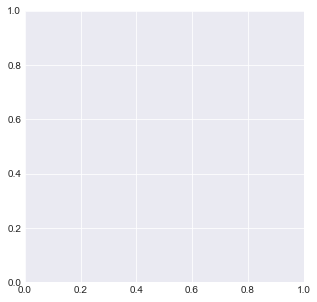

In [3]:
# style
plt.style.use('seaborn-darkgrid')
plt.subplots(figsize=(5, 5));

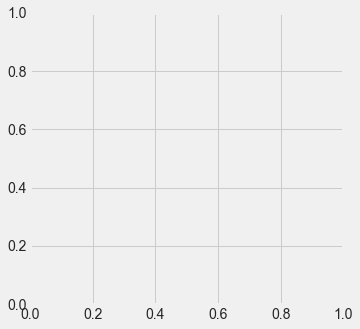

In [4]:
# avec un context manager
with plt.style.context('fivethirtyeight'):
    plt.subplots(figsize=(5, 5))

A noter, la liste des styles disponibles est dans la variable `matplotlib.pyplot.style.available`.

In [5]:
# styles disponibles
print(*plt.style.available, sep='\n')

Solarize_Light2
_classic_test_patch
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn
seaborn-bright
seaborn-colorblind
seaborn-dark
seaborn-dark-palette
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
tableau-colorblind10


#### Fonctions de `pyplot`

Fonctions de *pyplot*|Commentaires
-|-
figure()|création d'un objet *Figure*
plot()|création d'un graphique
subplots()|création d'un graphique avec sous-graphiques
scatter()|affichage d'un nuage de points
axhline()|affichage d'une ligne horizontale
axvline()|affichage d'une ligne verticale
colorbar()|affichage d'un nuancier latéral
annotate()|ajout d'annotations
show()|visualisation
imshow()|visualisation d'une image
savefig()|sauvegarde d'une figure dans un fichier (png, pdf, ps, eps, svg)
clear() ou clf(), cla()|effacement de la figure, d'un objet *Axes*

La fonction `figure()` crée une nouvelle figure, elle prend en paramètres :
- figsize : dimension du graphique
- dpi : résolution du graphique
- facecolor : couleur de fond
- edgecolor : couleur des bords

La méthode `add_subplot()` de `Figure` permet de créer un sous-graphique (appelé `axes` ou `subplot`). Elle prend 3 arguments : nombre de lignes, nombre de colonnes et numéro du sous-graphique (démarrant à `1` de gauche à droite et de haut en bas).

Par commodité, lorsque ces nombres sont inférieurs à 10, ils peuvent être concaténés sous la forme d'un entier.

Exemples :
- 111 : unique sous-graphique d'un graphique 1 ligne x 1 colonne
- 211, 212 : sous-graphiques d'un graphique 2 lignes x 1 colonne
- 121, 122 : sous-graphiques d'un graphique 1 ligne x 2 colonnes
- 221, 222, 223, 224 : sous-graphiques d'un graphique 2 lignes x 2 colonnes

La fonction `subplots()` grée une figure et les axes (subplots) en précisant les nombres de lignes et de colonnes. Elle retourne un tuple composé de la figure et de un `Axes` (subplot) ou un `ndarray` d'`Axes` (subplots).

#### Méthodes de `Axes`

Fonctions de *Axes*|Commentaires
-|-
plot()|graphique
axhline()|ligne horizontale
axvline()|ligne verticale
scatter()|nuage de points
set_title()|titre
set_xlabel()|label de l'axe des X (idem pour Y)
set_xticks()|marques de l'axe des X (idem pour Y)
set_xticklabels()|labels des marques de l'axe des X (idem pour Y)
legend()|légende et positionnement
clear()|effacement

#### Graphique élémentaire

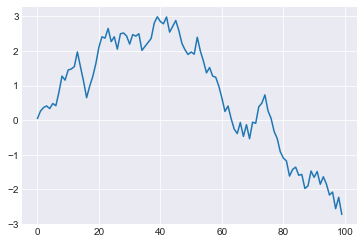

In [7]:
# on crée une figure élémentaire
np.random.seed(0)
plt.plot((np.random.random(100) - 0.5).cumsum());

#### Graphique simple

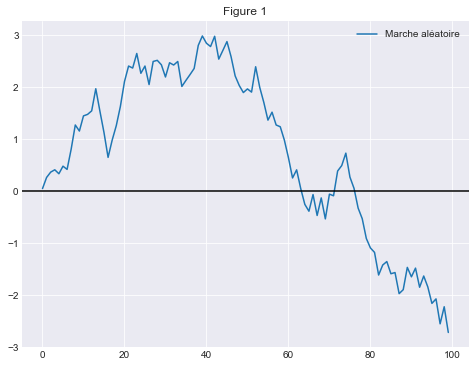

In [8]:
# on crée une figure avec un unique subplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)  # équivalent à ax = fig.add_subplot(1, 1, 1)
ax.set_title("Figure 1")
np.random.seed(0)
ax.plot((np.random.random(100) - 0.5).cumsum())
ax.axhline(y=0, color='k')
ax.legend(["Marche aléatoire"], loc="best");

<div class="alert alert-success">
<b>Exercice 1</b>
<ul>
    <li>Implémentez une fonction qui affiche deux marches aléatoires dans le même graphique.</li>
    <li>Ajoutez des lignes horizontales en pointillés avec la moyenne de chaque courbe.</li>
    <li>Observez le positionnement de la légende</li>
</ul>
</div>

In [32]:
def double_walk():
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)  # équivalent à ax = fig.add_subplot(1, 1, 1)
    ax.set_title("double marche")
    m1 = (np.random.random(100) - 0.5).cumsum()
    ax.plot(m1, color='r')
    m2 = (np.random.random(100) - 0.5).cumsum()
    ax.plot(m2, color='b')
    ax.axhline(y=m1.mean(), color='r', ls=':')
    ax.axhline(y=m2.mean(), color='b', ls=':')
    ax.legend(["Marche 1", "Marche 2"], loc="best");

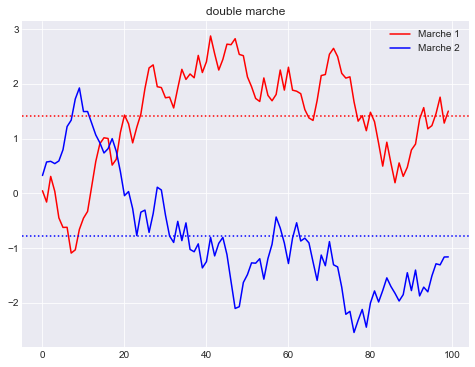

In [33]:
double_walk()

#### Positionnement de la légende

Emplacement (chaîne)|Emplacement (code)
-|-
'best'|0
'upper right'|1
'upper left'|2
'lower left'|3
'lower right'|4
'right'|5
'center left'|6
'center right'|7
'lower center'|8
'upper center'|9
'center'|10

Il est également possible de spécifier une position relative avec l'option *bbox_to_anchor=(x, y)* qui fixe la position relative de la légende : 0.0 = bas/gauche, 1.0 = haut/droite.

<div class="alert alert-success">
<b>Exercice 2</b>
<ul>
    <li>Modifiez la fonction de sorte que les arguments en mots-clefs soient tous transmis à la méthode <code>legend()</code>.</li>
    <li>Essayez différentes positions pour la légende.</li>
    <li>Essayez l'option <code>bbox_to_anchor</code> pour mettre la légend à droite du graphique.</li>
</ul>
</div>

In [34]:
def double_walk(**kwargs):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)  # équivalent à ax = fig.add_subplot(1, 1, 1)
    ax.set_title("double marche")
    m1 = (np.random.random(100) - 0.5).cumsum()
    ax.plot(m1, color='r')
    m2 = (np.random.random(100) - 0.5).cumsum()
    ax.plot(m2, color='b')
    ax.axhline(y=m1.mean(), color='r', ls=':')
    ax.axhline(y=m2.mean(), color='b', ls=':')
    ax.legend(["Marche 1", "Marche 2"], **kwargs);

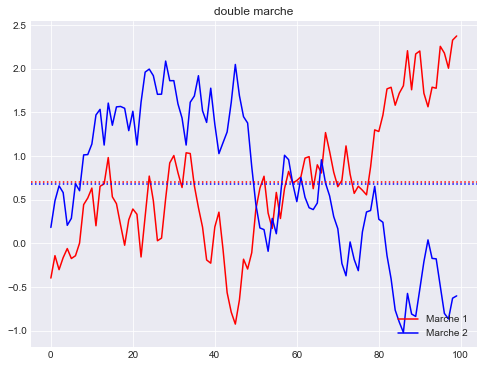

In [36]:
double_walk(loc='lower right')

In [41]:
def double_walk():
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)  # équivalent à ax = fig.add_subplot(1, 1, 1)
    ax.set_title("double marche")
    m1 = (np.random.random(100) - 0.5).cumsum()
    ax.plot(m1, color='r')
    m2 = (np.random.random(100) - 0.5).cumsum()
    ax.plot(m2, color='b')
    ax.axhline(y=m1.mean(), color='r', ls=':')
    ax.axhline(y=m2.mean(), color='b', ls=':')
    ax.legend(["Marche 1", "Marche 2"], bbox_to_anchor=(1.05, 0.1));

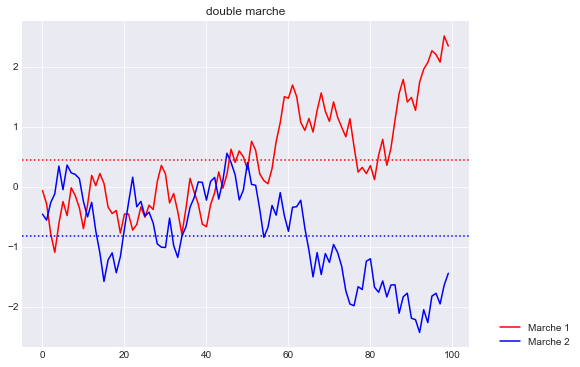

In [42]:
double_walk()

#### Graphique composé

Utilisation répétée de la méthode **add_subplot()**.

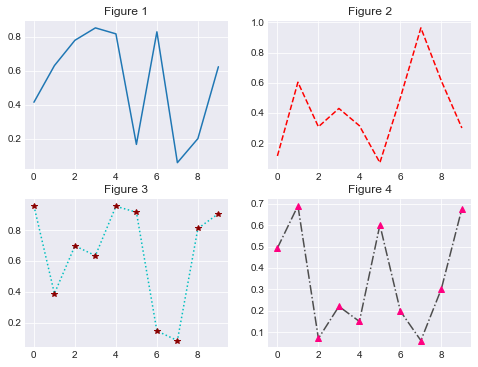

In [43]:
# figure composée
fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(221)
ax1.set_title("Figure 1")
ax1.plot(np.random.random(10))

ax2 = fig.add_subplot(222)
ax2.set_title("Figure 2")
ax2.plot(np.random.random(10), 'r--')

ax3 = fig.add_subplot(223)
ax3.set_title("Figure 3")
x = np.random.random(10)
ax3.plot(x, 'c:')
ax3.plot(x, '*', color='darkred')

ax4 = fig.add_subplot(224)
ax4.set_title("Figure 4")
x = np.random.random(10)
ax4.plot(x, '-.', color='0.3')
ax4.plot(x, '^', color='#ff0080');

Idem avec la fonction **subplots()**.

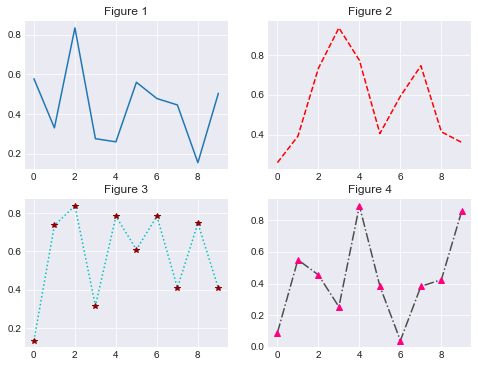

In [44]:
# figure composée
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(8, 6))

ax1.set_title("Figure 1")
ax1.plot(np.random.random(10))

ax2.set_title("Figure 2")
ax2.plot(np.random.random(10), 'r--')

ax3.set_title("Figure 3")
x = np.random.random(10)
ax3.plot(x, 'c:')
ax3.plot(x, '*', color='darkred')

ax4.set_title("Figure 4")
x = np.random.random(10)
ax4.plot(x, '-.', color='0.3')
ax4.plot(x, '^', color='#ff0080');

De base, il existe dans *matplotlib* :
- 4 types de trait : '-' (plein), '--' (tiret), ':' (pointillé), '-.' (alterné)
- plusieurs référentiels de couleurs :
    - 8 couleurs prédéfinies : 'b' (bleu), 'g' (vert), 'r' (rouge), 'c' (cyan), 'm' (magenta), 'y' (jaune), 'k' (noir), 'w' (blanc)
    - niveaux de gris : nombre entre 0 (noir) et 1 (blanc) sous forme de chaine de caractères
    - 150 couleurs nommées : voir la variable *matplotlib.colors.cnames*
    - 16+ millions de couleurs RVB en hexadécimal : #xxyyzz
- 35 marqueurs de point : voir la variable *matplotlib.lines.Line2D.markers*.

In [45]:
# couleurs
print(*mpl.colors.cnames, sep=' ')

aliceblue antiquewhite aqua aquamarine azure beige bisque black blanchedalmond blue blueviolet brown burlywood cadetblue chartreuse chocolate coral cornflowerblue cornsilk crimson cyan darkblue darkcyan darkgoldenrod darkgray darkgreen darkgrey darkkhaki darkmagenta darkolivegreen darkorange darkorchid darkred darksalmon darkseagreen darkslateblue darkslategray darkslategrey darkturquoise darkviolet deeppink deepskyblue dimgray dimgrey dodgerblue firebrick floralwhite forestgreen fuchsia gainsboro ghostwhite gold goldenrod gray green greenyellow grey honeydew hotpink indianred indigo ivory khaki lavender lavenderblush lawngreen lemonchiffon lightblue lightcoral lightcyan lightgoldenrodyellow lightgray lightgreen lightgrey lightpink lightsalmon lightseagreen lightskyblue lightslategray lightslategrey lightsteelblue lightyellow lime limegreen linen magenta maroon mediumaquamarine mediumblue mediumorchid mediumpurple mediumseagreen mediumslateblue mediumspringgreen mediumturquoise mediumv

In [46]:
# marqueurs
print(*mpl.lines.Line2D.markers, sep=' ')

. , o v ^ < > 1 2 3 4 8 s p * h H + x D d | _ P X 0 1 2 3 4 5 6 7 8 9 10 11 None None   


<div class="alert alert-success">
<b>Exercice 3</b>
<ul>
    <li>Modifiez le graphique en ajoutant 1 colonne avec 2 figures :</li>
    <li>Figure 5: solid line and gold color width of 2 + black squares.</li>
    <li>Figure 6: dashed line and light grey + blue circles.</li>
</ul>